# Name: Samir Thota
### Date: 08/19/2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 100px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 25.8 points per game  
- 2nd Team: 22.9 points per game  
- 3rd Team: 20.5 points per game  
- All-Star: 21.7 points per game   

**Question 2:** 3.2 Years  

**Question 3:** 

- Elite: 2 players.  
- All-Star: 1 players.  
- Starter: 8 players.  
- Rotation: 3 players.  
- Roster: 6 players.  
- Out of League: 53 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.8%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [1]:
import pandas as pd
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("awards_data.csv")
player_data = pd.read_csv("player_stats.csv")
team_data = pd.read_csv("team_stats.csv")
rebounding_data = pd.read_csv("team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [2]:
combined = player_data.merge(awards, on=['nbapersonid', 'season'], how='inner')

#combined tables and now will aggregatge results based on each team
filtered_years = combined[(combined['season'] >= 2007) & (combined['season'] <= 2021)]
FirstTotalPoints = filtered_years.groupby(['All NBA First Team']).agg({'points': 'mean'})['points'][1]
FirstTotalGames = filtered_years.groupby(['All NBA First Team']).agg({'games': 'mean'})['games'][1]
FirstTeam = FirstTotalPoints/FirstTotalGames
SecondTotalPoints = filtered_years.groupby(['All NBA Second Team']).agg({'points': 'mean'})['points'][1]
SecondTotalGames = filtered_years.groupby(['All NBA Second Team']).agg({'games': 'mean'})['games'][1]
SecondTeam = SecondTotalPoints/SecondTotalGames
ThirdTotalPoints = filtered_years.groupby(['All NBA Third Team']).agg({'points': 'mean'})['points'][1]
ThirdTotalGames = filtered_years.groupby(['All NBA Third Team']).agg({'games': 'mean'})['games'][1]
ThirdTeam = ThirdTotalPoints/ThirdTotalGames
AllStarTotalPoints = filtered_years.groupby(['all_star_game']).agg({'points': 'mean'})['points'][1]
AllStarTotalGames = filtered_years.groupby(['all_star_game']).agg({'games': 'mean'})['games'][1]
AllStar = AllStarTotalPoints/AllStarTotalGames
FirstTeam, SecondTeam, ThirdTeam, AllStar

(25.84562295677443, 22.890289103039287, 20.45423792520203, 21.683991075673894)

<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 25.8 points per game  
2nd Team: 22.9 points per game  
3rd Team: 20.5 points per game  
All-Star: 21.7 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [3]:
filtered_players = combined[(combined['draftyear'] >= 2007) &
                            ((combined['All NBA First Team'] == 1) |
                             (combined['All NBA Second Team'] == 1) |
                             (combined['All NBA Third Team'] == 1))].copy()
filtered_players.sort_values(['player', 'season'], inplace=True)

#filtered players and then will subtract first award season from draft year
first = filtered_players.groupby('player')['season'].first()
filtered_players['First All NBA Season'] = filtered_players['player'].map(first)
filtered_players['experience'] = filtered_players['First All NBA Season'] - filtered_players['draftyear']

average_experience = filtered_players['experience'].mean()
average_experience

3.176

<strong><span style="color:red">ANSWER 2:</span></strong>  

3.2 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [4]:
combined = player_data.merge(awards, on=['nbapersonid', 'season'], how='inner')
combined.loc[combined['season'] == 2011, 'games_start'] *= 82 / 66
combined.loc[combined['season'] == 2019, 'mins'] *= 82 / 72
combined.loc[combined['season'] == 2020, 'mins'] *= 82 / 72

#assign each season an outcome
def outcome(row):
    if row['All NBA First Team'] == 1 or row['All NBA Second Team'] == 1 or row['All NBA Third Team'] == 1 or \
       row['Most Valuable Player_rk'] == 1 or row['Defensive Player Of The Year_rk'] == 1:
        return 'Elite'
    elif row['all_star_game'] == True:
        return 'All-Star'
    elif row['games_start'] >= 41 or row['mins'] >= 2000:
        return 'Starter'
    elif row['mins'] >= 1000:
        return 'Rotation'
    elif row['games'] > 0:
        return 'Roster'
    else:
        return 'Out of the League'
    
#apply each outcome and then make sure they have played at least 4 seasons
combined['single_season_outcome'] = combined.apply(outcome, axis=1)
players_four = combined.groupby('player')['season'].count() >= 4
eligible_players = players_four[players_four].index
combined['min_season'] = combined.groupby('player')['season'].transform('min') + 3
experience_data = combined[(combined['player'].isin(eligible_players)) & \
                                    (combined['season'] > combined['min_season'])]


#assign numeric values to outcome to allow for sorting
outcome_to_value = {
    'Elite': 5,
    'All-Star': 4,
    'Starter': 3,
    'Rotation': 2,
    'Roster': 1,
    'Out of the League': 0
}
experience_data = experience_data.copy()
experience_data['outcome_value'] = experience_data['single_season_outcome'].map(outcome_to_value)


#find 2nd highest peak for 2 years, could be same as peak if they are equivalent
max_outcome = (
    experience_data.groupby('player')['outcome_value']
    .rolling(window=2, min_periods=2)
    .max()
    .reset_index()
)

experience_data = experience_data.copy()
sorted_players = max_outcome.sort_values('outcome_value', ascending=False)
second_peak_value = (
    sorted_players.groupby('player')['outcome_value']
    .apply(lambda x: x.iloc[1] if len(x) > 1 else x.iloc[0])
) 

experience_data['second_peak_outcome_value'] = experience_data['player'].map(second_peak_value)


#filter the results to only find career outcome for players drafted in 2010
players_2010 = combined[combined['draftyear'] == 2010]['player']
highest_2010 = experience_data[experience_data['player'].isin(players_2010)]
highest_2010= highest_2010.drop_duplicates(subset='player')
highest_2010 = highest_2010[['player','single_season_outcome']]

#If player not on list, subtract from total of 73, and they are out of the league
highest_2010['single_season_outcome'].value_counts()


Starter     8
Roster      6
Rotation    3
Elite       2
All-Star    1
Name: single_season_outcome, dtype: int64

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 8 players.  
Rotation: 3 players.  
Roster: 6 players.  
Out of League: 53 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



In [5]:
# Note: Here as well as anywhere else, feel free to add as many code chunks as you'd like.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
combined['all_star_game'] = combined['all_star_game'].map({True: 1}).fillna(0)

#checking for players who were drafted in or before 2015 season with 7 years of experience
eligible_players = combined[combined['draftyear']<=2015].copy()
players_seven = combined.groupby('player')['season'].count() >= 7
eligible = players_seven[players_seven].index
eligible_players = combined[combined['player'].isin(eligible)].copy()

#picking specific features to test to find outcome, all_star_game is categorical which means has yes or no
features = ['points', 'PER', 'WS', 'games','all_star_game'] 
target = 'single_season_outcome'

#mapping numerical values onto the career outcomes
target_mapping = {'Elite': 5, 'All-Star': 4, 'Starter': 3, 'Rotation': 2, 'Roster': 1}
eligible_players['target_label'] = eligible_players[target].map(target_mapping)
  
    
#splitting group into testing and training
X = eligible_players[features]
y = eligible_players['target_label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=45)


# Training the OLS regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Evaluating the model
y_pred = regressor.predict(X_val)
y_pred_rounded = y_pred.round() 

# Predict career outcomes for players within the range
players_e = combined[(combined['draftyear'] >= 2018) & (combined['draftyear'] <= 2021)][['player', 'season']]
players_to_predict = combined[(combined['draftyear'] >= 2018) & (combined['draftyear'] <= 2021)][features]
predicted_probabilities = regressor.predict(players_to_predict)
predicted_prob = pd.DataFrame(predicted_probabilities, columns=['Predicted_Value'])

#create final table with Name, Year, and Predicted Value for career
players_e = players_e.reset_index(drop=True)
predicted_prob['Player Name'] = players_e['player']  # Add the 'player' column to the DataFrame
predicted_prob['Season'] = players_e['season']

#predicted career outcome based on season
#table shows top 15 predicted outcomes: 3-Starter, 4-All Star, 5-Elite
predicted_prob.sort_values('Predicted_Value',ascending=False).head(15)

,Predicted_Value,Player Name,Season
463,5.152086,Trae Young,2021
298,4.628838,Luka Dončić,2020
540,4.623079,Luka Doncic,2021
115,4.557447,Luka Dončić,2019
384,4.472909,Zion Williamson,2020
503,4.443691,LaMelo Ball,2021
78,4.405667,Trae Young,2019
528,4.360163,Darius Garland,2021
620,4.253243,Ja Morant,2021
506,3.454333,Miles Bridges,2021


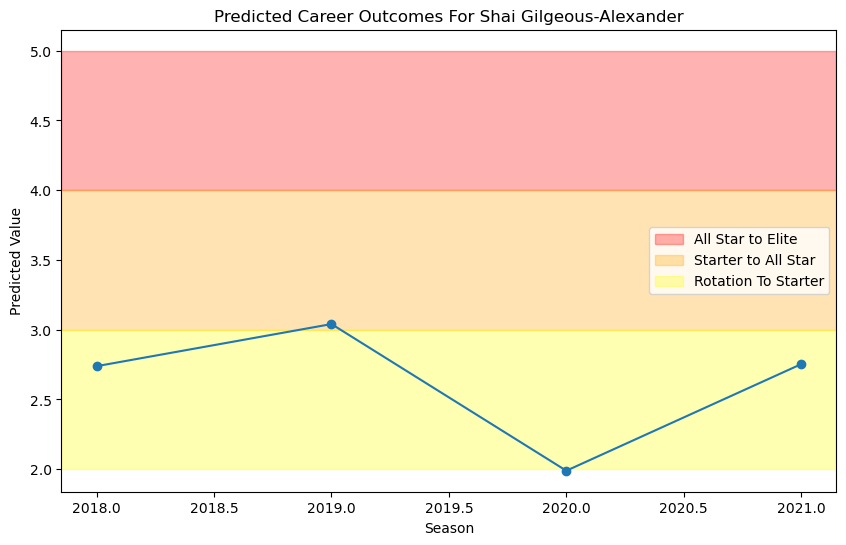

In [6]:
#Choosing a specific player from 2018-2021 to see what career outcome they are predicted to have based of the season
player_named = predicted_prob[predicted_prob['Player Name'] == 'Shai Gilgeous-Alexander']
plt.figure(figsize=(10, 6))
plt.plot(player_named['Season'], player_named['Predicted_Value'], marker='o')
plt.xlabel('Season')
plt.ylabel('Predicted Value')
plt.title('Predicted Career Outcomes For Shai Gilgeous-Alexander')

# Color coding based on career outcomes
plt.axhspan(4, 5, color='red', alpha=0.3, label='All Star to Elite')
plt.axhspan(3, 4, color='orange', alpha=0.3, label='Starter to All Star')
plt.axhspan(2, 3, color='yellow', alpha=0.3, label='Rotation To Starter')

plt.legend()
plt.show()
#Shai Starts of in 2018 being between a predicted career Rotation to Starter
#In 2019, he improves to the range of between Starter to All Star
#There is a drop his 3rd season in predited value, before rising back up in his 4th

In [7]:
predicted_prob[predicted_prob['Player Name'] == 'Zion Williamson']
#In his first recorded season,he had a career predictor of 1.7 which is betweem Roster and Rotation
#Second Season there is a large improvement to 4.1 to move between the range of All-Star and Elite
#A graph similar to Shai Gilgeous Alexander is not the best way to show data for players between 1-2 seasons

,Predicted_Value,Player Name,Season
173,1.505672,Zion Williamson,2019
384,4.472909,Zion Williamson,2020


In [8]:
predicted_prob[predicted_prob['Player Name'] == 'James Wiseman']
#James Wisement only has one recorded season within this span and has a value between Roster and Rotation of 1.7

,Predicted_Value,Player Name,Season
324,1.659745,James Wiseman,2020


In [9]:
predicted_prob[predicted_prob['Player Name'] == 'Josh Giddey']
#In Josh Giddey's one season he is predicted between Roster and Rotation with a score of 1.9

,Predicted_Value,Player Name,Season
679,2.011274,Josh Giddey,2021


Overview: First we filter the players who have played 7 seasons and were drafted before 2015. Then we choose features we believe are valuable in gauging their career outcome. I chose a few advanced stats in PER to measure efficiency and Win shares to see how much they contribute to team wins. I also believed All-Stars would be a good indicator of career success. From there, we chose what we wanted to predict which was career outcome, and based on the definition that was the second-best season they were able to achieve after already playing 4 seasons in the league. We created a model that trained with our data to simulate the probable outcomes and return us a value of what career box they were most likely to reach. 

Strengths and Weakness: I believe the model shows a clear numerical value of where they fall between the career boxes rather than rounding towards one. I also believe the ability to pick any feature continuous or categorical is beneficial to the process. A weakness as of now is the efficiency of the features chosen. There are only 4 and there are many others that could help optimize the process of predicting career outcome. 

Address Weakness: There are more technical approaches such as utilizing decision trees or random forests to hone in on what the best features for the process are.

Visualization: I used a line graph to map the predicted career outcome for Shai-Gilgeous Alexander. Based on each continuous year played, we can see his changing predictions for where his career outcome would end up. The graph is organized into colored bins to demonstrate the levels of career outcomes.

Players Analysis: Especially with players such as Josh Giddey or Zion Williamson who have played a few seasons, the metrics are not the best representation. This is due to first-year players being unlikely to be All-Stars or score a high amount of points. This leaves the first-year value for both players between Roster and Rotation. However, we do see an immense improvement for Zion Williamson in his second year to be between All Star and Elite

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [10]:
rebounding_data_okc = rebounding_data[rebounding_data['team'] == 'OKC']
rebounding_avg_okc = rebounding_data_okc[rebounding_data_okc['game_number'] <= 80]['oreb_pct'].mean()
rebounding_avg_okc

0.2878860611061612

<strong><span style="color:red">ANSWER 1:</span></strong>  

28.8% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:light blue">ANSWER 2: For this model, to get into depth of a players inpact on offensive rebounding, we could calculate how many offensive rebounds they contribute to the team alone with how many missed shots they have. With this extra information we would be able to insert or remove there odds based on if they were playing</span></strong>  

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:black">ANSWER 3: Another weakness to this model is that it is unable to distinguish based of off the upcoming team. However, we have the data for the opponents, so we would be able to determine the opponents abiltiy to limit offensive rebound percent. Having a model where we would be able to account for these values would help optimize the values. Other variables can strongly influence the model such as shot selection. Typically short shots are more likely to have offensive rebounds as there many players crowding the paint. Similarly to opponent, these problems would best be adressed with a model capable of using these features.  </span></strong>  

In [11]:
import plotly.express as pd
import plotly.io as pio
pio.renderers.default = 'notebook'